2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

In [1]:
from sklearn.datasets import make_blobs
import random

import numpy as np
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap

X, y = make_blobs(n_samples=100, random_state=1)

Изобразим точки на графике.

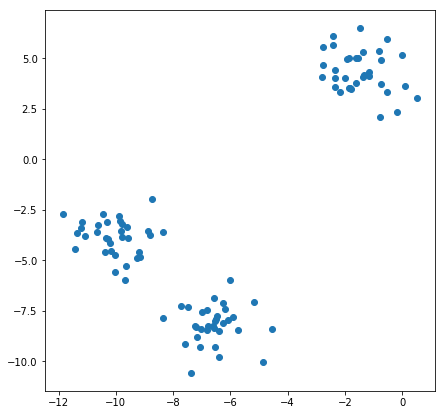

In [2]:
plt.figure(figsize=(7,7))
plt.scatter(X[:, 0], X[:, 1])

В качестве метрики расстояния будем использовать евклидово расстояние, функция для которого была написана ранее. В качестве центроидов выберем первые k элементов датасета. Реализуем основной цикл алгоритма.

In [3]:
def kmeans(data, k, max_iterations, min_distance):
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}

        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes

In [4]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [5]:
# подсчет качества определения ОДНОГО кластера по внутренней метрике 
def cl_quality(Z):
    centroid = np.average(Z, axis=0)
    score = 0
    for bbl in Z: 
        score += e_metrics(bbl, centroid)
    score /= len(Z)
    return score

Напишем функцию для визуализации кластеров

In [6]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b', 'c', 'y', 'brown', 'm', '0.3', '0.5', '0.7']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
            
    plt.show()

In [7]:
# определим максимальное количество итераций
max_iterations = 5
# и минимальное расстояние между центроидами 
min_distance = 1e-4

Text(0, 0.5, 'Total dist')

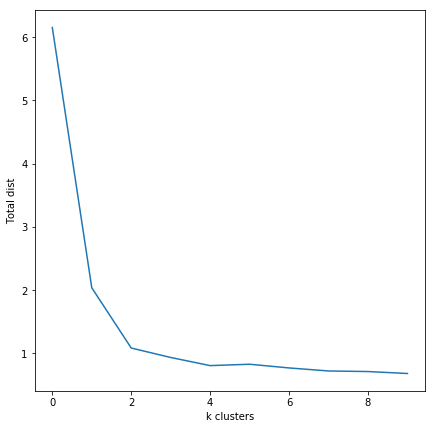

In [9]:
K = 10
q_lst = []
for k in range(1,K+1):
    score = 0
    centroids, clusters = kmeans(X, k, max_iterations, min_distance)
    for ik in range(k):
        score_i = cl_quality(clusters[ik])
        score += score_i 
    q_lst.append(score/k)

#plt.figure(figsize(17,7))
plt.figure(figsize=(7,7))
plt.plot(q_lst)
plt.xlabel('k clusters')
plt.ylabel('Total dist')

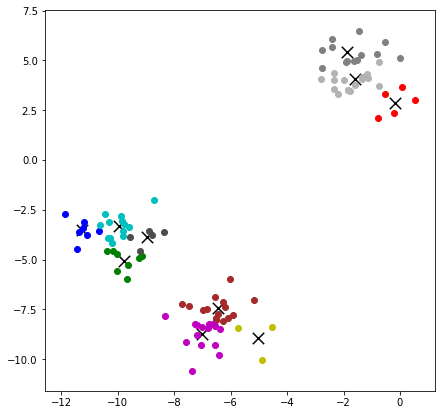

In [11]:
visualize(centroids, clusters)

In [ ]:
# Чёткой границы: где достаточно уточнять количество кластеров не отмечаю..
# возможно нужны другие метрики   